In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
df=pd.read_csv('file:///F:/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
df.shape

(1987, 10)

In [5]:
df.shape

(1987, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [8]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [9]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [10]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [11]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [12]:
df.corr().describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.154647,0.178468,0.222519,0.179776,0.174292,0.260353
std,0.414479,0.403449,0.415115,0.403974,0.404713,0.390180
min,-0.041506,-0.020101,-0.025031,-0.041506,-0.006858,0.006196
25%,-0.020488,-0.001848,-0.018918,-0.004673,0.000978,0.028907
50%,-0.005888,0.017384,-0.008258,0.027809,0.012774,0.070484
75%,0.003418,0.052647,0.297285,0.066984,0.025704,0.317550
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
df['GraduateOrNot']=le.fit_transform(df['GraduateOrNot'])

In [25]:
le=LabelEncoder()
df['FrequentFlyer']=le.fit_transform(df['FrequentFlyer'])

In [26]:
le=LabelEncoder()
df['EverTravelledAbroad']=le.fit_transform(df['EverTravelledAbroad'])

In [27]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,6,1,0,0,0
1,1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


In [32]:
df=df.drop(['Unnamed: 0'],axis='columns')

In [33]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                        29.650226
GraduateOrNot               0.851535
AnnualIncome           932762.959235
FamilyMembers               4.752894
ChronicDiseases             0.277806
FrequentFlyer               0.209864
EverTravelledAbroad         0.191243
TravelInsurance             0.357323
dtype: float64

In [34]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                        29.650226
GraduateOrNot               0.851535
AnnualIncome           932762.959235
FamilyMembers               4.752894
ChronicDiseases             0.277806
FrequentFlyer               0.209864
EverTravelledAbroad         0.191243
TravelInsurance             0.357323
dtype: float64

In [35]:
df.min()

Age                                   25
Employment Type        Government Sector
GraduateOrNot                          0
AnnualIncome                      300000
FamilyMembers                          2
ChronicDiseases                        0
FrequentFlyer                          0
EverTravelledAbroad                    0
TravelInsurance                        0
dtype: object

In [36]:
df.max()

Age                                              35
Employment Type        Private Sector/Self Employed
GraduateOrNot                                     1
AnnualIncome                                1800000
FamilyMembers                                     9
ChronicDiseases                                   1
FrequentFlyer                                     1
EverTravelledAbroad                               1
TravelInsurance                                   1
dtype: object

In [37]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                        29.650226
GraduateOrNot               0.851535
AnnualIncome           932762.959235
FamilyMembers               4.752894
ChronicDiseases             0.277806
FrequentFlyer               0.209864
EverTravelledAbroad         0.191243
TravelInsurance             0.357323
dtype: float64

In [38]:
df.max()

Age                                              35
Employment Type        Private Sector/Self Employed
GraduateOrNot                                     1
AnnualIncome                                1800000
FamilyMembers                                     9
ChronicDiseases                                   1
FrequentFlyer                                     1
EverTravelledAbroad                               1
TravelInsurance                                   1
dtype: object

In [39]:
x=df.drop(['Employment Type'],axis='columns')

In [40]:
df=df.rename({'Employment Type':'Employment_Type'},axis='columns')

In [41]:
df.head()

,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


In [42]:
y=df.Employment_Type.values

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [44]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

96.4824120603015

In [45]:
print(classification_report(ytest,pred_tre))

                              precision    recall  f1-score   support

           Government Sector       0.95      0.93      0.94       175
Private Sector/Self Employed       0.97      0.98      0.98       422

                    accuracy                           0.96       597
                   macro avg       0.96      0.95      0.96       597
                weighted avg       0.96      0.96      0.96       597



In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

96.4824120603015

In [48]:
print(classification_report(ytest,pred_kne))

                              precision    recall  f1-score   support

           Government Sector       0.92      0.85      0.88       175
Private Sector/Self Employed       0.94      0.97      0.95       422

                    accuracy                           0.93       597
                   macro avg       0.93      0.91      0.92       597
                weighted avg       0.93      0.93      0.93       597



In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

90.45226130653266

In [51]:
print(classification_report(ytest,pred_ada))

                              precision    recall  f1-score   support

           Government Sector       0.93      0.73      0.82       175
Private Sector/Self Employed       0.90      0.98      0.94       422

                    accuracy                           0.90       597
                   macro avg       0.91      0.85      0.88       597
                weighted avg       0.91      0.90      0.90       597



In [52]:
from sklearn.ensemble import BaggingClassifier

In [53]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

96.31490787269682

In [54]:
print(classification_report(ytest,pred_bag))

                              precision    recall  f1-score   support

           Government Sector       0.96      0.91      0.94       175
Private Sector/Self Employed       0.97      0.98      0.97       422

                    accuracy                           0.96       597
                   macro avg       0.96      0.95      0.95       597
                weighted avg       0.96      0.96      0.96       597



In [55]:
from sklearn.svm import SVC

In [56]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_l=accuracy_score(ytest,pre_siv)*100
accu_l

80.90452261306532

In [57]:
print(classification_report(ytest,pre_siv))

                              precision    recall  f1-score   support

           Government Sector       0.94      0.37      0.53       175
Private Sector/Self Employed       0.79      0.99      0.88       422

                    accuracy                           0.81       597
                   macro avg       0.87      0.68      0.71       597
                weighted avg       0.84      0.81      0.78       597



In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

79.89949748743719

In [60]:
print(classification_report(ytest,pre_gau))

                              precision    recall  f1-score   support

           Government Sector       0.87      0.37      0.52       175
Private Sector/Self Employed       0.79      0.98      0.87       422

                    accuracy                           0.80       597
                   macro avg       0.83      0.67      0.70       597
                weighted avg       0.81      0.80      0.77       597



In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)*100
accu_ada

90.45226130653266

In [63]:
print(classification_report(ytest,pre_ada))

                              precision    recall  f1-score   support

           Government Sector       0.93      0.73      0.82       175
Private Sector/Self Employed       0.90      0.98      0.94       422

                    accuracy                           0.90       597
                   macro avg       0.91      0.85      0.88       597
                weighted avg       0.91      0.90      0.90       597



In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
grd=GradientBoostingClassifier()
grd.fit(xtrain,ytrain)
pre_grd=grd.predict(xtest)
accu_grd=accuracy_score(ytest,pre_ada)*100
accu_grd

90.45226130653266

In [66]:
print(classification_report(ytest,pre_grd))

                              precision    recall  f1-score   support

           Government Sector       0.99      0.82      0.89       175
Private Sector/Self Employed       0.93      1.00      0.96       422

                    accuracy                           0.94       597
                   macro avg       0.96      0.91      0.93       597
                weighted avg       0.95      0.94      0.94       597



In [67]:
from sklearn.ensemble import ExtraTreesClassifier

In [69]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

91.95979899497488

In [70]:
print(classification_report(ytest,pre_etc))

                              precision    recall  f1-score   support

           Government Sector       0.91      0.81      0.85       175
Private Sector/Self Employed       0.92      0.97      0.94       422

                    accuracy                           0.92       597
                   macro avg       0.92      0.89      0.90       597
                weighted avg       0.92      0.92      0.92       597



In [71]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','SVC','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier'],
    'Score': [ accu_tre,accu_l, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_ada,accu_grd,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,DecisionTreeClassifier,96.482412
2,KNeighborsClassifier,96.482412
4,BaggingClassifier,96.314908
9,ExtraTreesClassifier,91.959799
3,AdaBoostClassifier,90.452261
7,AdaBoostClassifier,90.452261
8,GradientBoostingClassifier,90.452261
1,RandomForestClassifier,79.899497
5,SVC,79.899497
6,GaussianNB,79.899497


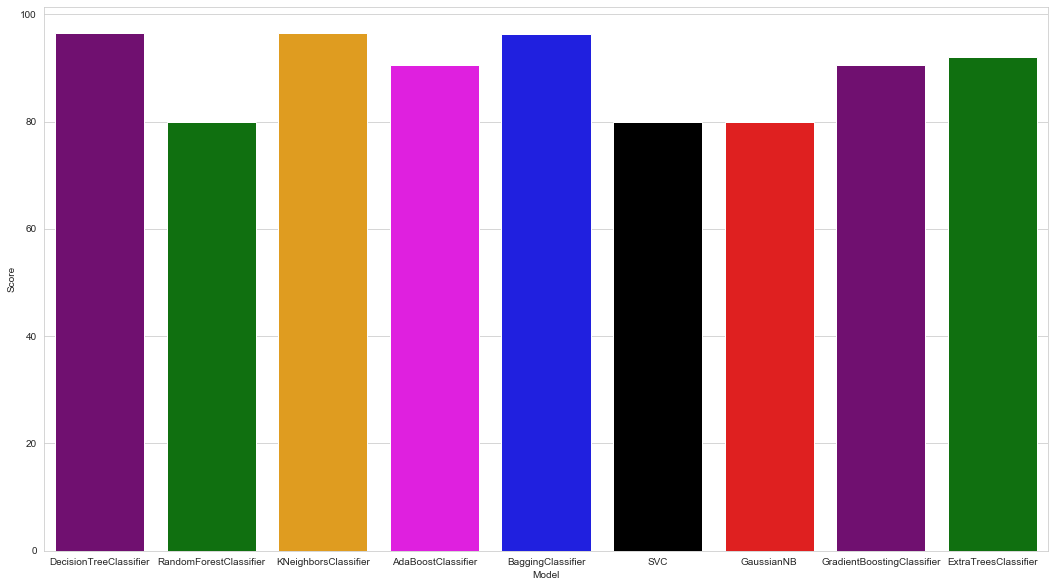

In [74]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(18,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [75]:
df.head()

,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


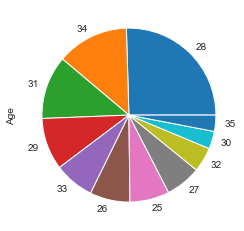

In [76]:
df.Age.value_counts().plot(kind='pie')

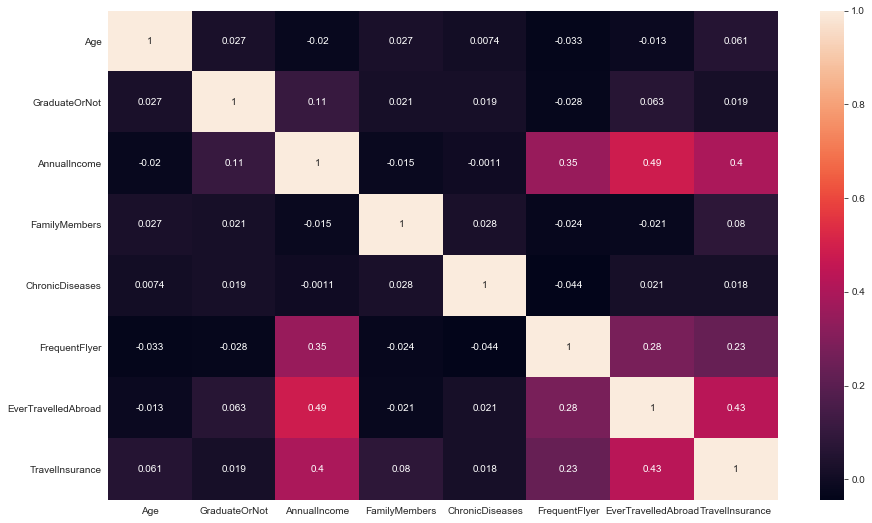

In [77]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

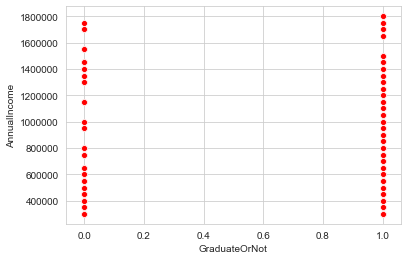

In [80]:
sns.scatterplot(x=df["GraduateOrNot"], y=df["AnnualIncome"],color='red', 
data=df)

In [81]:
df.corr().abs()['AnnualIncome'].sort_values(ascending = False)

AnnualIncome           1.000000
EverTravelledAbroad    0.486043
TravelInsurance        0.396763
FrequentFlyer          0.353087
GraduateOrNot          0.108066
Age                    0.020101
FamilyMembers          0.015367
ChronicDiseases        0.001149
Name: AnnualIncome, dtype: float64

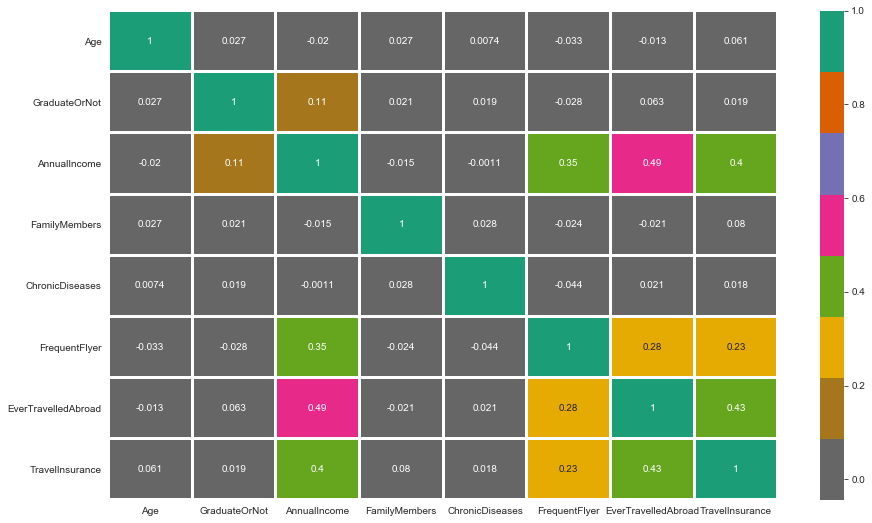

In [82]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

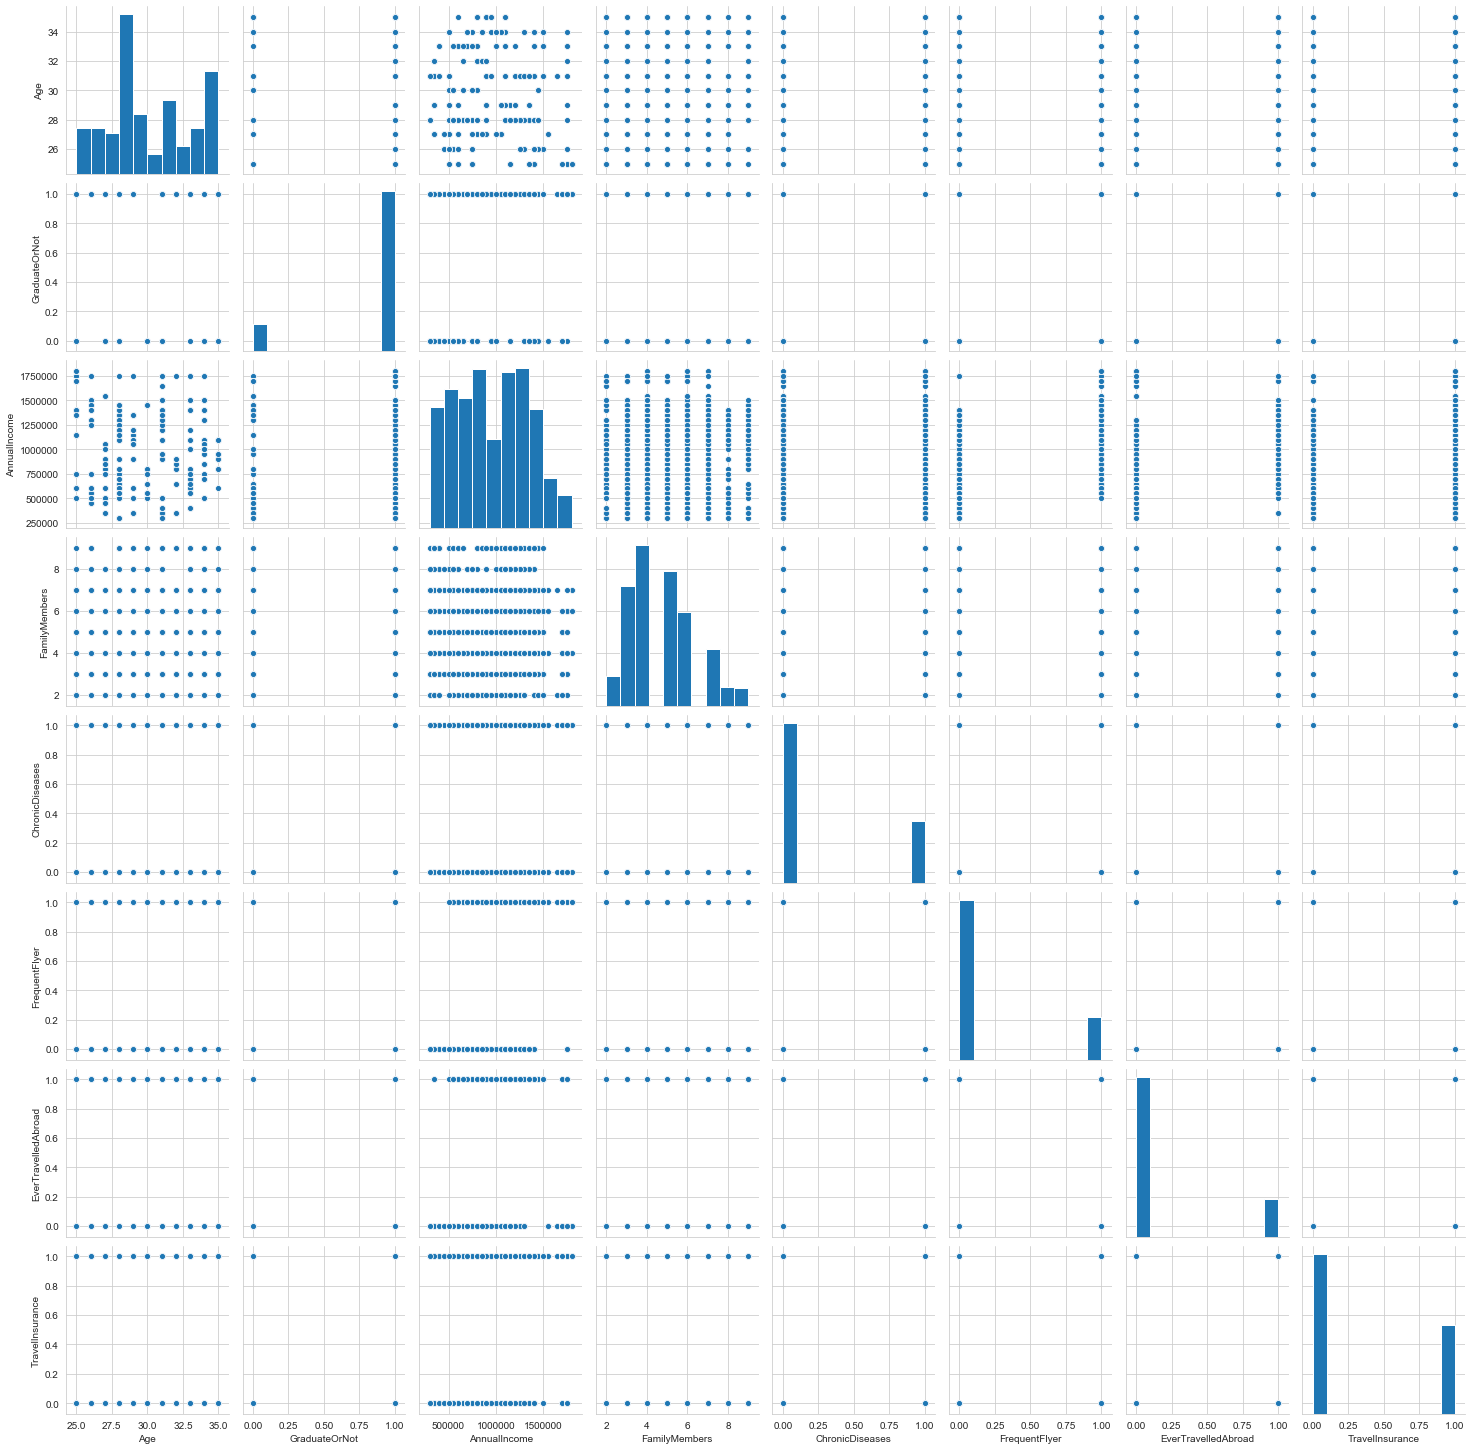

In [83]:
sns.pairplot(df)

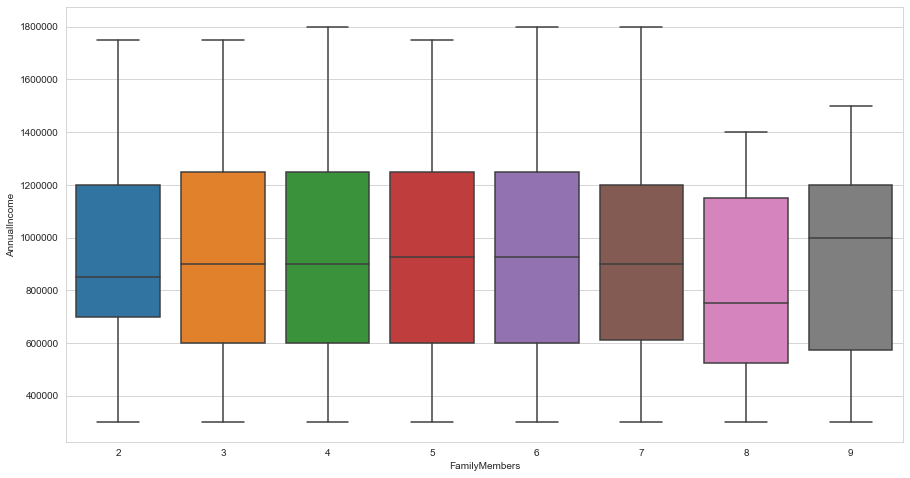

In [89]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["AnnualIncome"], x=df["FamilyMembers"], 
data=df)


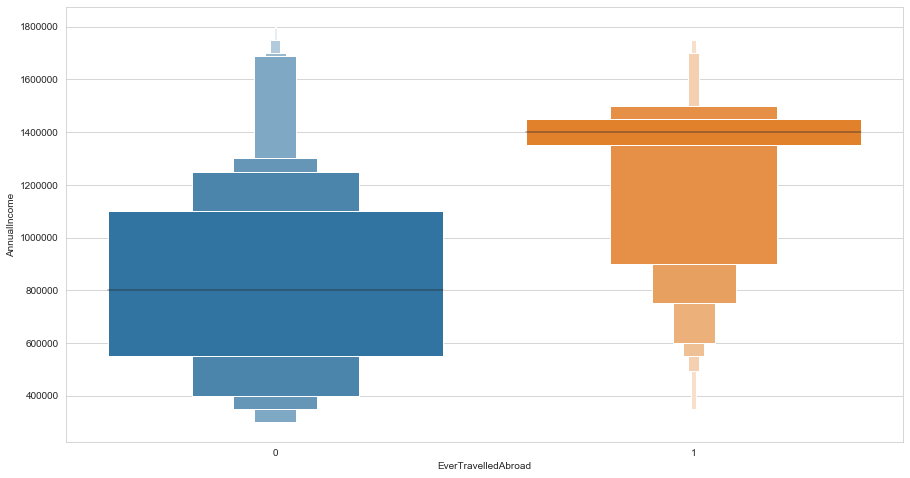

In [91]:
plt.figure(figsize=(15,8))
sns.boxenplot(y=df["AnnualIncome"], x=df["EverTravelledAbroad"], 
data=df)

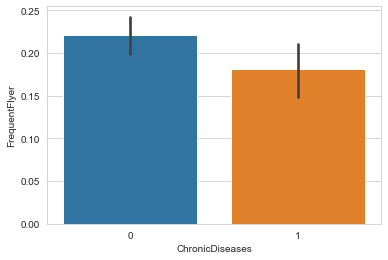

In [92]:
sns.barplot(x=df["ChronicDiseases"], y=df["FrequentFlyer"], 
data=df)

In [93]:
df.columns

Index(['Age', 'Employment_Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

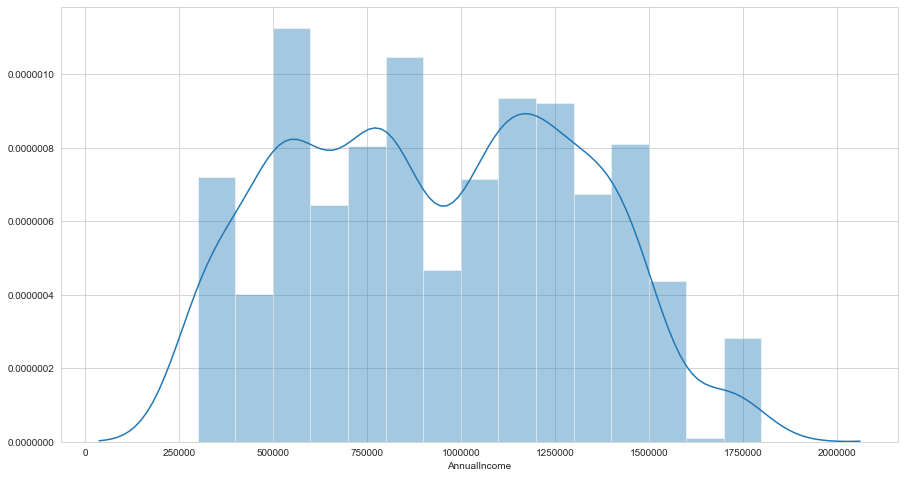

In [95]:
plt.figure(figsize=(15,8))
sns.distplot(df['AnnualIncome'])

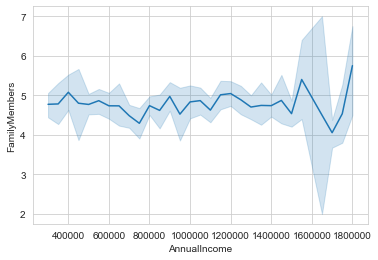

In [96]:
sns.lineplot(x=df["AnnualIncome"], y=df["FamilyMembers"], 
data=df)

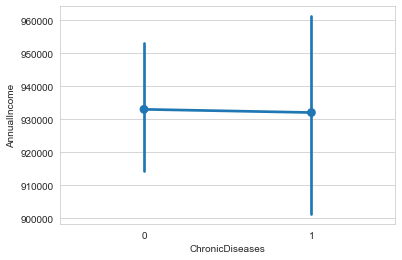

In [100]:

sns.pointplot(y=df["AnnualIncome"], x=df["ChronicDiseases"], 
data=df)

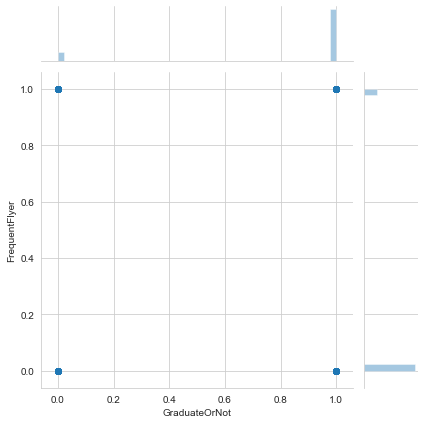

In [103]:
sns.jointplot(x=df["GraduateOrNot"], y=df["FrequentFlyer"],
data=df)

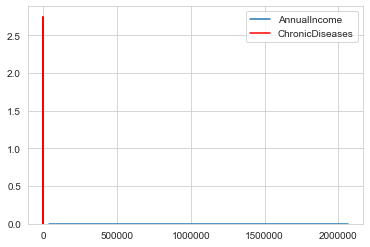

In [106]:
sns.kdeplot(df['AnnualIncome'])
#sns.kdeplot(df['student2'])
sns.kdeplot(df['ChronicDiseases'],color='red')

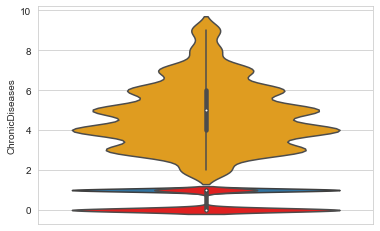

In [107]:
sns.violinplot(y="GraduateOrNot",data=df)
sns.violinplot(y="FamilyMembers",data=df,color='orange')
sns.violinplot(y="ChronicDiseases",data=df,color='red')

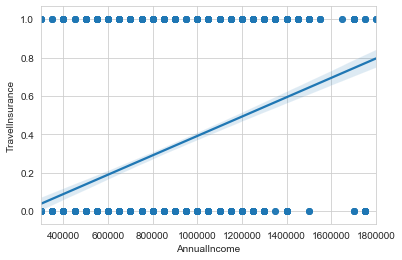

In [108]:
sns.regplot(x=df["AnnualIncome"], y=df["TravelInsurance"], 
data=df)

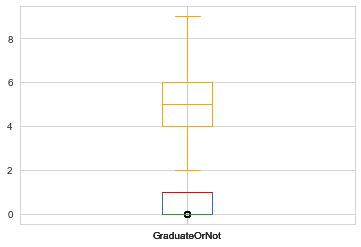

In [109]:
df.boxplot(column="ChronicDiseases")
df.boxplot(column="FamilyMembers",color='orange')
df.boxplot(column="GraduateOrNot",color='red')

In [110]:
import sweetviz as sv

In [111]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [112]:
from IPython.display import IFrame

In [113]:
IFrame(src='Analyze.html',width=1000,height=600)

In [115]:
df.columns

Index(['Age', 'Employment_Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [118]:
man=MinMaxScaler()
feat=['Age','GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,1.0,0.066667,0.571429,1.0,0.0,0.0,0.0
1,0.6,1.0,0.633333,0.714286,0.0,0.0,0.0,0.0
2,0.9,1.0,0.133333,0.285714,1.0,0.0,0.0,1.0
3,0.3,1.0,0.266667,0.142857,1.0,0.0,0.0,0.0
4,0.3,1.0,0.266667,0.857143,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1982,0.8,1.0,0.800000,0.285714,0.0,1.0,1.0,1.0
1983,0.3,1.0,0.966667,0.428571,1.0,0.0,1.0,0.0
1984,0.3,1.0,0.566667,0.571429,1.0,0.0,0.0,0.0
1985,0.9,1.0,0.466667,0.571429,0.0,1.0,1.0,1.0


In [119]:
std=StandardScaler()
feat=['Age','GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.463430,0.417552,-1.414061,0.774964,1.612339,-0.515369,-0.486277,-0.745648
1,0.463430,0.417552,0.842012,1.396373,-0.620217,-0.515369,-0.486277,-0.745648
2,1.493446,0.417552,-1.148641,-0.467855,1.612339,-0.515369,-0.486277,1.341116
3,-0.566587,0.417552,-0.617800,-1.089265,1.612339,-0.515369,-0.486277,-0.745648
4,-0.566587,0.417552,-0.617800,2.017783,1.612339,1.940358,-0.486277,-0.745648
...,...,...,...,...,...,...,...,...
1982,1.150107,0.417552,1.505563,-0.467855,-0.620217,1.940358,2.056440,1.341116
1983,-0.566587,0.417552,2.169114,0.153554,1.612339,-0.515369,2.056440,-0.745648
1984,-0.566587,0.417552,0.576591,0.774964,1.612339,-0.515369,-0.486277,-0.745648
1985,1.493446,0.417552,0.178461,0.774964,-0.620217,1.940358,2.056440,1.341116
